In [1]:
import os

base_directory = os.getcwd()# store your base directory for easy reference
print(base_directory)

assignment_two_data = os.pardir + '\\Assignments\\Homework_Two_Data\\'

c:\Users\mrssi\OneDrive\Desktop\Math_596_Git_Clone\Lecture_Notes


In [18]:
# Load core libraries and utilities
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
# Jupyter notebook "magic"
%matplotlib inline

In [3]:
# We need to be able to pass in a directory and build an image list
def file_builder(directory):
    image_list = []
    # iterate over files in
    # that directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename != "Readme":
                image_list.append( io.imread(os.path.join(root, filename), as_gray=True) )
    return image_list

In [4]:
# We need a tool that converts images into grayscale (i.e. all pixel values in [0, 1])
def gray_scale_convert(image):
    rescaled_image = np.zeros((image.shape[0], image.shape[1]))
    rescaled_image[:, :] = image
    rescaled_image -= np.min(rescaled_image)
    rescaled_image /= np.max(rescaled_image)
    return rescaled_image

In [31]:
# We would like to easily comapre different images to one another after we do various things to them.  
def image_comparison(original_image, reduced_image):
    gscale_reduced_image = gray_scale_convert(reduced_image) # note, we need to make sure skinny_puppy is grayscale
    difference = np.abs( original_image - gscale_reduced_image )

    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    ax = axes.ravel()
    ax[0].imshow(original_image, cmap=plt.cm.gray)
    ax[0].set_title("Original")
    ax[1].imshow(gscale_reduced_image, cmap=plt.cm.gray) 
    ax[1].set_title("Reduced")
    ax[2].imshow(difference, cmap=plt.cm.gray)
    ax[2].set_title("Difference")
    fig.tight_layout()

In [5]:
# Build image lists for cropped and uncropped images
cropped_directory = assignment_two_data + '/CroppedYale/'
cropped_image_list = file_builder(cropped_directory)

In [16]:
num_crp_images = len(cropped_image_list)
crp_row, crp_col = np.shape(cropped_image_list[0])
crp_image_mat = np.zeros((crp_row*crp_col, num_crp_images), dtype=np.float64)
for cnt, image in enumerate(cropped_image_list):
    crp_image_mat[:, cnt] = image.flatten()

print(f"Pixel counts are {crp_row} by {crp_col}")


Pixel counts are 192 by 168


In [7]:
crp_avg = np.mean(crp_image_mat, axis=1)
# Note, to turn crp_avg into a column vector use: crp_avg.reshape(-1, 1)
crp_image_mat -= np.tile(crp_avg.reshape(-1,1), (1, num_crp_images))

In [8]:
u_crp, s_crp, vh_crp = np.linalg.svd(crp_image_mat, full_matrices=False)


Pixel count is 1600 by 1200


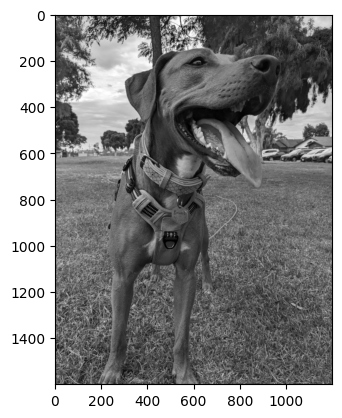

In [46]:
# Find, load, and convert image from textbook data
beanie = io.imread('beans.jpg', as_gray=True)
brows, bcols = beanie.shape

plt.imshow(beanie, cmap=plt.cm.gray)
print(f"Pixel count is {brows} by {bcols}")

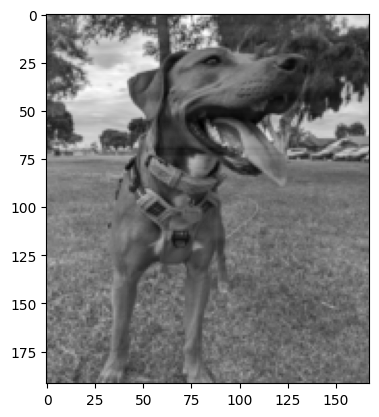

In [51]:
small_beans = resize(beanie, (crp_row, crp_col), anti_aliasing=True)
beans_avg = np.tile(np.mean(small_beans, axis=1).reshape(-1,1), (1,crp_col))
# Note, to turn crp_avg into a column vector use: crp_avg.reshape(-1, 1)
zero_avg_beans = small_beans - beans_avg
plt.imshow(zero_avg_beans, cmap=plt.cm.gray)


(32256, 555)


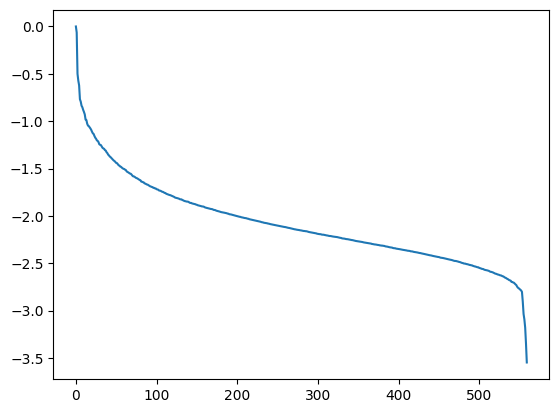

In [55]:
scaled_s_vals = np.log10(s_crp/s_crp[0])
plt.plot(scaled_s_vals[:-1])
indskp = scaled_s_vals >= -3.
selected_pca_modes = u_crp[:, indskp]
print(selected_pca_modes.shape)

In [56]:
respanned_beans = selected_pca_modes.T @ small_beans.flatten()
rebuilt_beans = np.zeros((crp_row, crp_col))
for jj in range(selected_pca_modes.shape[1]):
    rebuilt_beans += respanned_beans[jj] * np.reshape(selected_pca_modes[:, jj], (crp_row, crp_col))
rebuilt_beans = gray_scale_convert(rebuilt_beans+beans_avg)

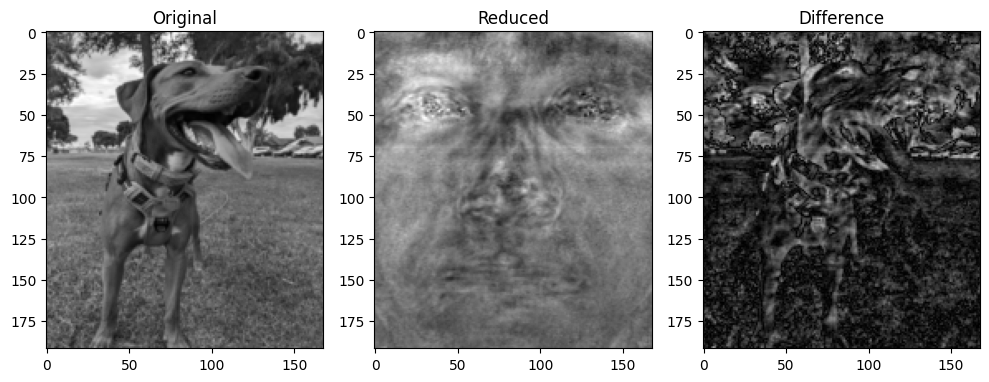

In [57]:
image_comparison(small_beans, rebuilt_beans)
